In [161]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from brian2.units import *
import matplotlib as mlib
from scipy import stats

In [162]:
# print mlib.rcParams.keys()
# mlib.rc('lines', linewidth=2)
mlib.rcParams['lines.linewidth'] = 3
mlib.rcParams.update({'font.size': 22})
mlib.rcParams.update({'errorbar.capsize': 3})

In [163]:
case1_forever_data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/case1_forever.npz")
simtime = case1_forever_data['simtime'].ravel()[0]
print case1_forever_data['post_spikes']

case1_forever_inh_data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/case1_lateralin1_run1_@cb9f705572173a9a794d2925e014cdda.npz")
print case1_forever_inh_data['post_spikes']

case2_forever_data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/case_2_forever.npz")
print case2_forever_data['post_spikes']


case2_forever_inh_data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/case2_lateralin1_run1_@cb9f705572173a9a794d2925e014cdda.npz")
print case2_forever_inh_data['post_spikes']

case3_forever_data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/case_3_forever.npz")
print case3_forever_data['post_spikes']

case3_forever_inh_data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/case_3_forever_lat_inh.npz")
print case3_forever_inh_data['post_spikes']
# metadata = np.load("D:/Work/Neurogenesis-PhD/simulation_statistics/batch_2dd991bdb16f6d60bb4fad691d7d4169.npz")
# metadata = np.load("D:/Work/Neurogenesis-PhD/simulation_statistics/batch_d314b329a1e967c89b1726c35ae66f24.npz")
# print 'Total time taken for simulations:', metadata['total_time']
# print metadata['log_calls'][0]

[[  0.00000000e+00   1.37000000e+02]
 [  0.00000000e+00   1.49000000e+02]
 [  0.00000000e+00   1.59000000e+02]
 ..., 
 [  2.55000000e+02   1.19980300e+06]
 [  2.55000000e+02   1.19981100e+06]
 [  2.55000000e+02   1.19981900e+06]]
[[  0.00000000e+00   1.38000000e+02]
 [  0.00000000e+00   5.11000000e+02]
 [  0.00000000e+00   8.14000000e+02]
 ..., 
 [  2.55000000e+02   1.19963100e+06]
 [  2.55000000e+02   1.19975800e+06]
 [  2.55000000e+02   1.19986200e+06]]
[[  0.00000000e+00   1.26000000e+02]
 [  0.00000000e+00   1.39000000e+02]
 [  0.00000000e+00   1.49000000e+02]
 ..., 
 [  2.55000000e+02   1.19977400e+06]
 [  2.55000000e+02   1.19981500e+06]
 [  2.55000000e+02   1.19998900e+06]]
[[  0.00000000e+00   1.68000000e+02]
 [  0.00000000e+00   2.57000000e+02]
 [  0.00000000e+00   3.33000000e+02]
 ..., 
 [  2.55000000e+02   1.19963800e+06]
 [  2.55000000e+02   1.19977900e+06]
 [  2.55000000e+02   1.19993900e+06]]
[[  0.00000000e+00   1.21000000e+02]
 [  0.00000000e+00   1.30000000e+02]
 [  0.

In [164]:
simtime/1000

1200

In [165]:
case1_rate_evo = np.ones(100)*np.nan
case1_inh_rate_evo = np.ones(100)*np.nan
case2_rate_evo = np.ones(100)*np.nan
case2_inh_rate_evo = np.ones(100)*np.nan
case3_rate_evo = np.ones(100)*np.nan
case3_inh_rate_evo = np.ones(100)*np.nan

In [166]:
for _index, value in np.ndenumerate(case1_rate_evo):
    index =  _index[0]
    case1_rate_evo[index] = np.count_nonzero(
        np.logical_and(
            case1_forever_data['post_spikes'][:,1] >= (index * simtime/100), 
            case1_forever_data['post_spikes'][:,1] <= ((index+1) * simtime/100)
        )
    ) / 256. / (simtime/1000)
    case1_inh_rate_evo[index] = np.count_nonzero(
        np.logical_and(
            case1_forever_inh_data['post_spikes'][:,1] >= (index * simtime/100), 
            case1_forever_inh_data['post_spikes'][:,1] <= ((index+1) * simtime/100)
        )
    ) / 256. / (simtime/1000)
    case2_rate_evo[index] = np.count_nonzero(
        np.logical_and(
            case2_forever_data['post_spikes'][:,1] >= (index * simtime/100), 
            case2_forever_data['post_spikes'][:,1] <= ((index+1) * simtime/100)
        )
    )/ 256. / (simtime/1000)
    
    case2_inh_rate_evo[index] = np.count_nonzero(
        np.logical_and(
            case2_forever_inh_data['post_spikes'][:,1] >= (index * simtime/100), 
            case2_forever_inh_data['post_spikes'][:,1] <= ((index+1) * simtime/100)
        )
    ) / 256. / (simtime/1000)
    
    case3_rate_evo[index] = np.count_nonzero(
        np.logical_and(
            case3_forever_data['post_spikes'][:,1] >= (index * simtime/100), 
            case3_forever_data['post_spikes'][:,1] <= ((index+1) * simtime/100)
        )
    )/ 256. / (simtime/1000)
    case3_inh_rate_evo[index] = np.count_nonzero(
        np.logical_and(
            case3_forever_inh_data['post_spikes'][:,1] >= (index * simtime/100), 
            case3_forever_inh_data['post_spikes'][:,1] <= ((index+1) * simtime/100)
        )
    )/ 256. / (simtime/1000) 

In [167]:
case1_rate_evo *=100
case1_inh_rate_evo *=100
case2_rate_evo *=100
case2_inh_rate_evo *=100
case3_rate_evo *=100
case3_inh_rate_evo *=100

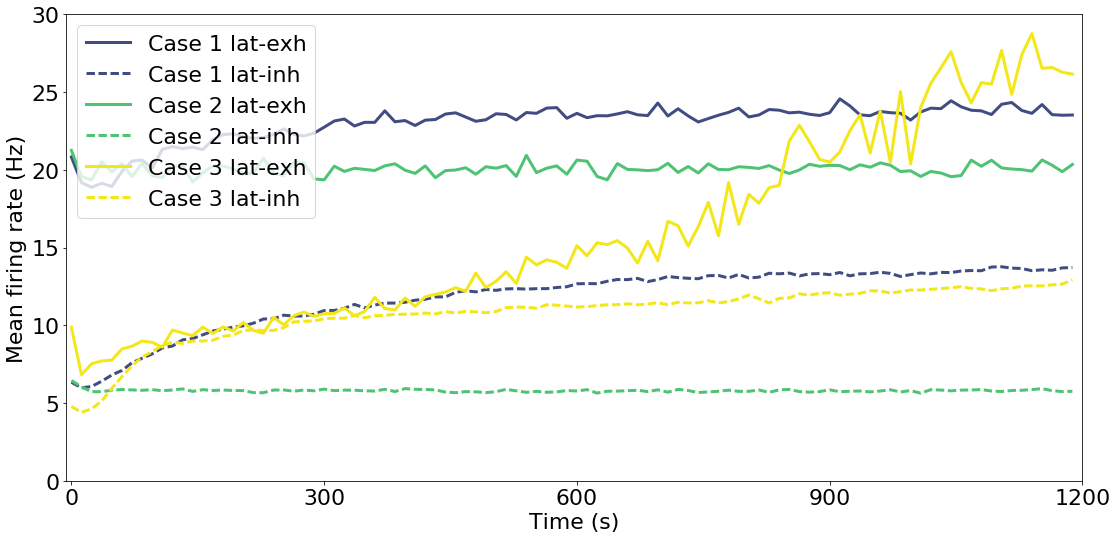

In [172]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=800)
ax1.plot(case1_rate_evo, color='#414C82', label='Case 1 lat-exh')
ax1.plot(case1_inh_rate_evo, linestyle='--', color='#414C82', label='Case 1 lat-inh')
ax1.plot(case2_rate_evo, color='#4EC373', label='Case 2 lat-exh')
ax1.plot(case2_inh_rate_evo, linestyle='--', color='#4EC373', label='Case 2 lat-inh')
ax1.plot(case3_rate_evo, color='#f3e718', label='Case 3 lat-exh')
ax1.plot(case3_inh_rate_evo, color='#f3e718', linestyle='--', label='Case 3 lat-inh')
xticks = np.asarray([0, 25, 50, 75, 100])
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks*12)

ax1.set_xlim([-.5, 100])
ax1.set_ylim([0, 30])
ax1.set_ylabel("Mean firing rate (Hz)")
ax1.set_xlabel("Time (s)")

ax1.legend(loc='upper left')
plt.tight_layout()
plt.savefig("rate_evolution_forever.png", dpi=800)
plt.show()

In [146]:
case3_forever_inh_data['post_spikes'].shape[0] / 256. / (1200)

10.742535807291667

In [147]:
np.mean(case3_inh_rate_evo)

0.10743574218750002

In [86]:
simtime/100

12000

In [94]:
case3_inh_rate_evo[99]*Hz

12.91861979 * hertz

In [93]:
case3_inh_rate_evo *=1000.
case3_rate_evo *=1000.

In [154]:
case1_inh_rate_evo

array([  6.38085938,   5.9593099 ,   6.03092448,   6.37727865,
         6.66861979,   7.0296224 ,   7.47460938,   7.62109375,
         8.14453125,   8.1936849 ,   8.50520833,   8.85384115,
         8.99772135,   9.30826823,   9.2718099 ,   9.46451823,
         9.74869792,   9.96191406,  10.19498698,  10.18001302,
        10.34375   ,  10.33951823,  10.49316406,  10.64973958,
        10.62858073,  10.68782552,  10.82226562,  10.88671875,
        10.9938151 ,  11.04557292,  11.14746094,  11.24576823,
        11.35644531,  11.53222656,  11.41015625,  11.67643229,
        11.57910156,  11.53938802,  11.77636719,  11.66699219,
        11.71809896,  11.9046224 ,  11.9749349 ,  12.14160156,
        12.01985677,  12.17285156,  12.21842448,  12.20019531,
        12.3733724 ,  12.31998698,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  